# Advent of Code 2023: coolcomputery

In [1]:
import numpy as np, math, itertools as it, time
from tqdm import tqdm

In [2]:
def LINES():
    with open('in.txt') as f:
        return f.read().split('\n')

## Day 24

### 24a

In [31]:
stones=[
    [
        [int(v) for v in tok.split(', ')]
        for tok in l.split(' @ ')
    ]
    for l in LINES()
]
stones=[
    [
        vec[:2]
        for vec in s
    ]
    for s in stones
]
'''
(x0+s*ux,y0+s*uy) == (x1+t*vx,y1+t*vy)
s*ux-t*vx=x1-x0
s*uy-t*vy=y1-y0
'''
def rays_intx(s0,s1):
    (x0,y0),(ux,uy)=s0
    (x1,y1),(vx,vy)=s1
    try:
        s,t=np.linalg.solve(
            [[ux,-vx],[uy,-vy]],
            [[x1-x0],[y1-y0]]
        ).flatten()
        if s>=0 and t>=0:
            return (x0+s*ux,y0+s*uy)
        else:
            return None
    except Exception:
        return None
# '''
# (x0+t*ux,y0+t*uy) == (x1+t*vx,y1+t*vy)
# ( (x1-x0)+t(vx-ux) , (y1-y0)+t(vy-uy) ) == (0,0)
# (x1-x0,y1-y0) == -t*(vx-ux,vy-uy)
# '''
# def scalenfac(pos,vel):
#     print(pos,vel)
#     x,y=pos
#     u,v=vel
#     if x*v!=y*u:
#         return None
#     return -u/x
# def stone_intx_t(s0,s1):
#     (x0,y0),(ux,uy)=s0
#     (x1,y1),(vx,vy)=s1
#     return scalenfac((x1-x0,y1-y0),(vx-ux,vy-uy))
def btwn(l,r,x):
    return l<=x and x<=r
# def stone_intx_in(s0,s1,xbounds,ybounds):
#     t=stone_intx_t(s0,s1)
#     print(t)
#     if t is not None and t>=0:
#         (x0,y0),(ux,uy)=s0
#         (x1,y1),(vx,vy)=s1
#         x,y=(x0+t*vx,x1+t*vy)
#         print(t)
#         return btwn(*xbounds,x) and btwn(*ybounds,y)
#     return False

out=0
for sa,sb in it.combinations(stones,2):
    ix=rays_intx(sa,sb)
    if ix is not None:
        x,y=ix
        if btwn(200000000000000,400000000000000,x) and btwn(200000000000000,400000000000000,y):
            out+=1
out

15107

### 24b

#### brute-forcing collision times of rock with first two stones (too slow)

In [87]:
stones=[
    [
        np.array([int(v) for v in tok.split(', ')])
        for tok in l.split(' @ ')
    ]
    for l in LINES()
]

'''
init pos (x0,y0,z0), vel (vx,vy,vz), time s>=0:
forms 4D ray (x0+s*vx,y0+s*vy,z0+s*vz,s), s>=0

for each hailstones of init pos (x[i],y[i],z[i]) and vel (vx[i],vy[i],vz[i]),
find some s[i] for each i s.t.
there exists x,y,z,vx,vy,vz s.t.

(x[i],y[i],z[i])+s[i]*(vx[i],vy[i],vz[i]) == (x,y,z)+s[i]*(vx,vy,vz)




there exists s s.t. (x0+s*ux,y0+s*uy,z0+s*uz)==(x1+s*vx,y1+s*vy,z1+s*vz)
    s*(u-v) = (p1-p0)
p1,v are pos,vel vectors of rock

(vx-ux,vy-uy,vz-uz) || (x1-x0,y1-y0,z1-z0)
(vx-ux)(y1-y0) == (vy-uy)(x1-x0)


to have rock @ init pos (xr,yr,zr)
    collide w/ all 
    need all (xr,yr,zr)-(x[i],y[i],z[i]) to be parallel to each other

(xr,yr,zr)-(x[i],y[i],z[i]) || (xr,yr,zr)-(x[j],y[j],z[j])

(xr-x[i])/(xr-x[j]) == (yr-y[i])/(yr-y[j]) == (zr-z[i])/(zr-z[j])

(xr-x[i])(yr-y[j])==(xr-x[j])(yr-y[i])

x[i]*y[j]-xr*y[j]-yr*x[i] == x[j]*y[i]-xr*y[i]-yr*x[j]

xr(y[i]-y[j]) + yr(x[j]-x[i]) == x[j]*y[i]-x[i]*y[j]

likewise, xr(z[i]-z[j]) + zr(x[j]-x[i]) == x[j]*z[i]-x[i]*z[j]
'''
def scalefac(u,v):
    #find s s.t. u=s*v
    n,=u.shape
    assert u.shape==v.shape
    if np.array_equal(u,v):
        return 1
    for a,b in zip(u,v):
        if b!=0:
            if np.array_equal(b*u,a*v):
                return a/b
    return None
def stones_collide(s0,s1):
    p0,v0=s0
    p1,v1=s1
    t=scalefac(p1-p0,v0-v1)
    return t is not None and t>=0

for sa,sb in it.combinations(stones,2):
    if stones_collide(sa,sb):
        print(f'!!! {sa},{sb} collide')

# for sa,sb in it.combinations(stones,2):
#     print(sa,sb,stone_intx_t(sa,sb))
(_pa,_va),(_pb,_vb)=stones[:2]
print((_pa,_va),(_pb,_vb))
T=3000
rock=None
n_candidates=0
for ta,tb in tqdm(it.product(range(T),repeat=2)):
    if ta!=tb:
        '''
        p[i]+s[i]*v[i] == p+s[i]*v
        p[j]+s[j]*v[j] == p+s[j]*v

        [p | v] [[1    1  ]  = [p[i]+s[i]*v[i] | p[j]+s[j]*v[j]]
                 [s[i] s[j]]
                 
        [[1 s[i]] * [ p.T   = [ (p[i]+s[i]*v[i]).T
         [1 s[j]]]    v.T ]     (p[j]+s[j]*v[j]).T ]
        '''
#         A=np.array([[1,1],[ta,tb]])
        B=np.stack([_pa+ta*_va,_pb+tb*_vb],axis=1)
        C=np.array([[tb,-ta],[-1,1]])@B.T
#         display(
#             (A,B,C.T,np.array([[tb,-ta],[-1,1]]))
#         )
#         assert np.array_equal(C.T@A,(tb-ta)*B)
        if (C%(tb-ta)==0).all():
            n_candidates+=1
            C//=(tb-ta)
            p,v=C
#             print(ta,tb,(p,v),[stones_collide(s,(p,v)) for s in stones])
            if all(
                stones_collide(s,(p,v))
                for s in stones
            ):
                rock=(p,v)
                print(rock)
                break
print(f'{n_candidates=}')
sum(rock[0])

(array([216518090678054, 311610807965630, 244665409335040]), array([-24, -43, 118])) (array([119252599207972, 265844340901442, 404506989029618]), array([ 93,   9, -69]))


9000000it [03:50, 39093.54it/s]

n_candidates=12896


TypeError: 'NoneType' object is not subscriptable

#### optimization by solving congruences (still too slow, and probably has a bug)

In [143]:
'''
p[i]+s[i]*v[i] == p+s[i]*v
p[j]+s[j]*v[j] == p+s[j]*v
all variables are integers

p == p[i]+s[i]*(v[i]-v)
p[j]+s[j]*v[j] == (p[i]+s[i]*(v[i]-v))+s[j]*v
    == p[i]+s[i]*v[i]+(s[j]-s[i])*v
(p[j]+s[j]*v[j]) - (p[i]+s[i]*v[i]) == (s[j]-s[i])*v ~ 0 mod k:=s[j]-s[i]
    ~ p[j]-p[i]+s[i]*(v[j]-v[i]) mod k
==> s[i]*(v[j]-v[i]) ~ p[i]-p[j] mod k
'''

'''
ax ~ c mod m
if ax,ay ~ c mod m ==> a(x-y) ~ 0 mod m

m | ak <==> m/gcd(m,a) | k <==> k ~ t*m/gcd(m,a) mod m for arbitrary t

ax+mk=c for some int x,k
g(a'x+m'k)=c, g=gcd(a,m)
(x,k)=(x0,k0)+t*(m',-a')
'''

'''
return x,y s.t. ax+by=gcd(a,b)

[a    = [[1       0]  * [a
 b%a]    [-(b//a) 1]]    b]
'''
def ext_gcd(a,b,M=None):
    if M is None:
        M=np.eye(2,dtype=int)
    if a>b:
        return ext_gcd(b,a,np.array([[0,1],[1,0]])@M)
    if a==0:
        return M[1]
    return ext_gcd(a,b%a,np.array([[1,0],[-(b//a),1]])@M)
def int_lin(a,c,m):
    assert a>0 and m>0,(a,m)
    # solve ax+my=c for integers x,y
    gx,gy=ext_gcd(a,m)
    g=a*gx+m*gy
    assert a%g==0 and m%g==0, (a,m,g,gx,gy)
    if c%g!=0:
        return None
    return (gx*(c//g),gy*(c//g)),(m//g,-(a//g))
def lin_cong(a,c,m):
    #solve ax ~ c mod m
    m=abs(m)
    if a<0:
        a,c=-a,-c
    c%=m
    if a==0:
        a=m
    ret=int_lin(a,c,m)
    if ret is None:
        return None
    (x0,y0),(dx,dy)=ret
    return x0,dx
# lin_cong(15,-10,310)
def arith_prog_truncate(a_p,lo,hi):
    # return all x0+v*k in closed interval [lo,hi]
    # lo <= x0+v*k <= hi
    # ceil((lo-x0)/v) <= k <= floor((hi-x0)/v)
    if a_p is None:
        return set()
    x0,v=a_p
    assert v>0
    return {x0+v*k for k in range((lo-x0+v-1)//v,(hi-x0)//v+1)}

stones=[
    [
        np.array([int(v) for v in tok.split(', ')])
        for tok in l.split(' @ ')
    ]
    for l in LINES()
]
def scalefac(u,v):
    #find s s.t. u=s*v
    n,=u.shape
    assert u.shape==v.shape
    if np.array_equal(u,v):
        return 1
    for a,b in zip(u,v):
        if b!=0:
            if np.array_equal(b*u,a*v):
                return a/b
    return None
def stones_collide(s0,s1):
    p0,v0=s0
    p1,v1=s1
    t=scalefac(p1-p0,v0-v1)
    return t is not None and t>=0

# for sa,sb in it.combinations(stones,2):
#     print(sa,sb,stone_intx_t(sa,sb))
def solve(stones,T):
    for sa,sb in it.combinations(stones,2):
        if stones_collide(sa,sb):
            print(f'!!! {sa},{sb} collide')
    
    (_pa,_va),(_pb,_vb)=stones[:2]
    print((_pa,_va),(_pb,_vb))
    work,n_candidates=0,0
    for k in tqdm(range(-2*(T-1),2*(T-1)+1)):
        if k!=0:
#             for ta in range(min(T,T-k)):
#             for ta in set.intersection(*[
#                 arith_prog_truncate(lin_cong(a,c,k),0,min(T,T-k)-1)
#                 for a,c in zip(_vb-_va,_pa-_pb)
#             ]):
            ta_candidates=None
            for a,c in zip(_vb-_va,_pa-_pb):
                S=arith_prog_truncate(lin_cong(a,c,k),0,min(T,T-k)-1)
                ta_candidates=(S if ta_candidates is None else ta_candidates&S)
                if len(ta_candidates)==0:
                    break
            for ta in ta_candidates:
                work+=1
                tb=ta+k
        #         A=np.array([[1,1],[ta,tb]])
                B=np.stack([_pa+ta*_va,_pb+tb*_vb],axis=1)
                C=np.array([[tb,-ta],[-1,1]])@B.T
        #         display(
        #             (A,B,C.T,np.array([[tb,-ta],[-1,1]]))
        #         )
        #         assert np.array_equal(C.T@A,(tb-ta)*B)
                if (C%(tb-ta)==0).all():
#                     assert np.array_equal((ta*_vb-_va)%k,(_pa-_pb)%k)
                    n_candidates+=1
                    C//=(tb-ta)
                    p,v=C
        #             print(ta,tb,(p,v),[stones_collide(s,(p,v)) for s in stones])
                    if all(
                        stones_collide(s,(p,v))
                        for s in stones
                    ):
                        print(f'{(work,n_candidates)=}')
                        return (p,v)
#                 else:
#                     assert not np.array_equal((ta*_vb-_va)%k,(_pa-_pb)%k)
    print(f'{(work,n_candidates)=}')
rock=solve(stones,T=1000_000)
print(rock)
sum(rock[0])

(array([216518090678054, 311610807965630, 244665409335040]), array([-24, -43, 118])) (array([119252599207972, 265844340901442, 404506989029618]), array([ 93,   9, -69]))


100%|███████████████████████████████| 3999997/3999997 [12:36<00:00, 5289.12it/s]

(work,n_candidates)=(4309084, 3546660)
None


TypeError: 'NoneType' object is not subscriptable

#### after reading solutions

using [u/evouga's solution](https://www.reddit.com/r/adventofcode/comments/18pnycy/comment/kepu26z/):

* $\vec{p}_i+s_i\vec{v}_i=\vec{p}+s_i\vec{v}
\Leftrightarrow (\vec{p}-\vec{p}_i)\times (\vec{v}-\vec{v}_i)=\vec{0}
\\
\Leftrightarrow (\vec{p}\times\vec{v})-(\vec{p}_i\times\vec{v})+(\vec{v}_i\times\vec{p})=-(\vec{p}_i\times\vec{v}_i)$

* eliminate the $\vec{p}\times\vec{v}$ term by combining these equations for different $i$
$\Rightarrow$ linear system over $\vec{p},\vec{v}$

In [277]:
def lcross(v):
    a,b,c=v
    return np.array([
        [0,-c,b],
        [c,0,-a],
        [-b,a,0],
    ],dtype=int)
def collide_both(sa,sb):
    pa,va=sa
    pb,vb=sb
    return (
#         lcross(vb-va),
#         lcross(pb-pa),
        np.concatenate([lcross(vb-va),lcross(pb-pa)],axis=1),
        -(np.cross(pb,vb)-np.cross(pa,va))
    )

stones=[
    [
        np.array([int(v) for v in tok.split(', ')])
        for tok in l.split(' @ ')
    ]
    for l in LINES()
]
A,B=[],[]
for pair in [
    stones[:2],
    [stones[0],stones[2]]
]:
    M,b=collide_both(*pair)
    A.append(M)
    B.append(b)
A,B=np.concatenate(A,axis=0),np.concatenate(B).reshape((-1,1))
# display(A,B)
# display(A.tolist())

def swap_rows(M,i,j):
    tmp=M[i][:]
    M[i]=M[j][:]
    M[j]=tmp
def row_scale(s,A):
    return [s*a for a in A]
def row_add(A,B):
    return [a+b for a,b in zip(A,B)]
def mat2str(M):
    return '['+'\n '.join(' '.join(f'{v._numerator}/{v._denominator}' for v in row) for row in M)+']'
def solve(A,B):
#     return np.linalg.solve(A,B)
    assert A.dtype==np.int64 and B.dtype==np.int64
    from fractions import Fraction
#     A,B=A.astype(np.float128),B.astype(np.float128)
#     A=[[Fraction(v) for v in row] for row in A]
#     B=[[Fraction(v) for v in row]]
    M=np.concatenate([A,B],axis=1)
    # IMPORTANT: vvvvvv  MUST CAST FROM np.int64 TO int
    M=[[Fraction(int(v)) for v in row] for row in M]
#     print(mat2str(M))
    nleads=0
    leads=[]
    for c in range(A.shape[1]):
#         print(f'{c=}')
        r0=None
        for r in range(nleads,A.shape[0]):
            if M[r][c]!=0:
                r0=r
                break
        if r0 is not None:
#             print(f'swap rows {(nleads,r0)}')
            swap_rows(M,nleads,r0)
#             print(mat2str(M))
#             print(f'normalize row {nleads} by factor {Fraction(1,M[nleads][c])}')
            M[nleads]=row_scale(Fraction(1,M[nleads][c]),M[nleads])
#             print(mat2str(M))
            assert M[nleads][c]==1
            
#             print(f'eliminate column {c}')
            for r in range(nleads+1,A.shape[0]):
                if M[r][c]!=0:
                    M[r]=row_add(row_scale(-M[r][c],M[nleads]),M[r])
#             print(mat2str(M))
            leads.append((nleads,c))
            nleads+=1
#     print(leads)
    for r,c in leads[::-1]:
        for i in range(0,r):
            if M[i][c]!=0:
                M[i]=row_add(M[i],row_scale(-M[i][c],M[r]))
#     print('rref:')
#     print(mat2str(M))
    for r in range(A.shape[0]):
        for c in range(A.shape[1]):
#             print(M[r][c],Fraction((1 if r==c else 0),1))
            x,y=M[r][c],Fraction((1 if r==c else 0),1)
            assert x._numerator*y._denominator==y._numerator*x._denominator
#             assert M[r][c]==Fraction((1 if r==c else 0),1), (M[r][c],Fraction((1 if r==c else 0),1))
    return [row[A.shape[1]:] for row in M]

ret=solve(A,B)
display(sum(v for row in ret[:3] for v in row),ret)
# A,B

Fraction(856642398547748, 1)

[[Fraction(422644646660238, 1)],
 [Fraction(244357651988392, 1)],
 [Fraction(189640099899118, 1)],
 [Fraction(260, 1)],
 [Fraction(-34, 1)],
 [Fraction(-181, 1)]]

## Day 23

### 23a

In [11]:
grid=LINES()
R,C=len(grid),len(grid[0])

DIR=[(1,0),(0,1),(-1,0),(0,-1)]
# mem={}
# def deepest(start,end):
#     if start==end:
#         return 0
#     state=(start,end)
#     if state not in mem:
#         out=0
#         r,c=start
#         for dr,dc in DIR:
#             nr,nc=r+dr,c+dc
#             if (
#                 0<=nr and nr<R and 0<=nc and nc<C
#                 and grid[r][c]!='#'
#                 and (
#                     grid[r][c]=='.'
#                     or (dr,dc)=={'v':(1,0),'>':(0,1),'^':(-1,0),'<':(0,-1)}[grid[r][c]]
#                 )
#             ):
#                 nv=(nr,nc)
#                 out=max(out,deepest(nv,end)+1)
#         mem[state]=out
#     return mem[state]
start=[(0,c) for c in range(C) if grid[0][c]!='#'][0]
end=[(R-1,c) for c in range(C) if grid[R-1][c]!='#'][0]
print(start,end)
# print(deepest(start,end))

def deepest(grid,start,end):
    R,C=len(grid),len(grid[0])
    path=set()
    ans={'max':0,'best':None}
    def dfs(v):
        if v==end:
            if len(path)>ans['max']:
                ans['max']=len(path)
                ans['best']=set(path)
            return
        r,c=v
        for dr,dc in DIR:
            nr,nc=r+dr,c+dc
            if (
                0<=nr and nr<R and 0<=nc and nc<C
                and grid[r][c]!='#' # meant to type `grid[nr][nc]` instead, but `grid[r][c]` is still correct
                and (
                    grid[r][c]=='.'
                    or (dr,dc)=={'v':(1,0),'>':(0,1),'^':(-1,0),'<':(0,-1)}[grid[r][c]]
                )
                and (nr,nc) not in path
            ):
                nv=(nr,nc)
                path.add(nv)
                dfs(nv)
                path.remove(nv)
    path.add(start)
    dfs(start)
    return ans
deepest(grid,start,end)['max']
#above function calculates number of nodes in the longest path
# so we should submit 1 minus the result (number of *edges* in the longest path)

(0, 1) (140, 139)


2219

### 23b

#### DFS, run until it generated a path length that was correct

In [26]:
grid=LINES()
R,C=len(grid),len(grid[0])

DIR=[(1,0),(0,1),(-1,0),(0,-1)]

start=[(0,c) for c in range(C) if grid[0][c]!='#'][0]
end=[(R-1,c) for c in range(C) if grid[R-1][c]!='#'][0]
print(start,end)

def deepest(grid,start,end):
    R,C=len(grid),len(grid[0])
    path=set()
    ans={'max':0,'best':None}
    logger={'st':time.time(),'mark':0,'work':0}
    def dfs(v):
        t=time.time()-logger['st']
        if t>=logger['mark']:
            print(f'\t{t=} work={logger["work"]} cur_best={ans["max"]}')
            logger['mark']+=10**int(np.log10(max(10,logger['mark'])))
        logger['work']+=1
        
        if v==end:
            if len(path)>ans['max']:
                ans['max']=len(path)
                ans['best']=set(path)
            return
        r,c=v
        for dr,dc in DIR:
            nr,nc=r+dr,c+dc
            if (
                0<=nr and nr<R and 0<=nc and nc<C
                and grid[nr][nc]!='#'
                and (nr,nc) not in path
            ):
                nv=(nr,nc)
                path.add(nv)
                dfs(nv)
                path.remove(nv)
    path.add(start)
    dfs(start)
    return ans
import sys
sys.setrecursionlimit(10_000)
deepest(grid,start,end)

#answer is 1 less than the result that would be returned by dfs
#submitting 6674 turned out to be correct

(0, 1) (140, 139)
	t=3.0994415283203125e-06 work=0 cur_best=0
	t=10.0 work=4244010 cur_best=2019
	t=20.0 work=8475314 cur_best=2019
	t=30.0 work=12440448 cur_best=2019
	t=40.07127499580383 work=16422297 cur_best=2019
	t=50.00000500679016 work=20353500 cur_best=2019
	t=60.0 work=24711373 cur_best=2019
	t=70.000070810318 work=28738860 cur_best=2019
	t=80.0 work=32849883 cur_best=2019
	t=90.0971040725708 work=36907767 cur_best=2019
	t=100.00000095367432 work=40802908 cur_best=2019
	t=200.0 work=81800224 cur_best=3187
	t=300.0000958442688 work=122376838 cur_best=6451
	t=400.0 work=162688083 cur_best=6675
	t=500.0000009536743 work=203780795 cur_best=6675
	t=600.0001451969147 work=245395628 cur_best=6675
	t=700.0000009536743 work=286836735 cur_best=6675
	t=800.0 work=329295829 cur_best=6675



KeyboardInterrupt



#### DP algorithm (ultimately did not use)

In [10]:
grid=LINES()
R,C=len(grid),len(grid[0])

DIR=[(1,0),(0,1),(-1,0),(0,-1)]

mem={}
logger={'st':time.time(),'mark':0,'work':0}
def nexts(grid,start,end,cur_path):
    r,c=start
    nexts=[]
    for dr,dc in DIR:
        nr,nc=r+dr,c+dc
        if (
            0<=nr and nr<R and 0<=nc and nc<C
            and grid[nr][nc]!='#'
            and (nr,nc) not in cur_path
        ):
            nexts.append((nr,nc))
    return nexts
def deepest(grid,start,end,cur_path):
    t=time.time()-logger['st']
    if t>=logger['mark']:
        print(f'\t{t=} work={logger["work"]} {len(mem)=}')
        logger['mark']+=10**int(np.log10(max(10,logger['mark'])))
    logger['work']+=1
    
    add=0
    while start!=end:
        nvs=nexts(grid,start,end,cur_path)
        if len(nvs)==0:
#             print(start,end,cur_path)
            return -float('inf')
        if len(nvs)>1:
            break
        nv,=nvs
        start=nv
        cur_path|={nv}
        add+=1
    stt=(start,end,cur_path)
    if stt in mem:
        return mem[stt]
    out=None
    if start==end:
        out=0
    else:
        nvs=nexts(grid,start,end,cur_path)
    #     assert len(nvs)>1
        out=-float('inf')
        for nv in nvs:
            out=max(
                out,
                1+deepest(grid,nv,end,cur_path|{nv})
            )
    out+=add
    mem[stt]=out
    return out
start=[(0,c) for c in range(C) if grid[0][c]!='#'][0]
end=[(R-1,c) for c in range(C) if grid[R-1][c]!='#'][0]
print(start,end)
import sys
sys.setrecursionlimit(10_000)
deepest(grid,start,end,frozenset({start})),len(mem)#,mem

(0, 1) (140, 139)
	t=0.0007879734039306641 work=0 len(mem)=0
	t=10.00581979751587 work=657 len(mem)=224
	t=20.00356364250183 work=1327 len(mem)=475
	t=30.002221822738647 work=2027 len(mem)=735
	t=40.00143790245056 work=2661 len(mem)=975
	t=50.003055810928345 work=3356 len(mem)=1235
	t=60.00862789154053 work=4031 len(mem)=1492
	t=70.0062267780304 work=4688 len(mem)=1723
	t=80.00303077697754 work=5368 len(mem)=1976
	t=90.00075078010559 work=6027 len(mem)=2226
	t=100.00370979309082 work=6684 len(mem)=2483
	t=200.00420093536377 work=13652 len(mem)=4967
	t=300.01932072639465 work=20822 len(mem)=7457
	t=400.0016589164734 work=27762 len(mem)=9882
	t=500.00608682632446 work=34709 len(mem)=12225
	t=600.0010056495667 work=41266 len(mem)=14525
	t=700.019642829895 work=47940 len(mem)=17030
	t=800.0014998912811 work=55002 len(mem)=19507
	t=900.0061666965485 work=61756 len(mem)=21859
	t=1000.0023708343506 work=69034 len(mem)=24384



KeyboardInterrupt



### a better solution for Day 23

In [3]:
grid=LINES()

'''
weighted directed graph:
{v:
    {n:(weight w of edge v-->n)
        for each out-neighbor n to v
    }
    for each vertex v
}
since we want to find the *longest* simple path in a graph,
    if we have multiple edges v-->n, we only need to store
    the highest weight
'''
def add_warc(G,u,v,w):
    if u not in G:
        G[u]={}
#     if v not in G[u]:
#         G[u][v]=[]
#     G[u][v].append(w)
    G[u][v]=max(G[u].get(v,-float('inf')),w)

DIR=[(1,0),(0,1),(-1,0),(0,-1)]
def dimgraph(grid,enforce_downhill):
    G={}
    for r in range(R):
        for c in range(C):
            if grid[r][c]!='#':
                for dr,dc in DIR:
                    nr,nc=r+dr,c+dc
                    if (
                        0<=nr and nr<R and 0<=nc and nc<C
                        and grid[nr][nc]!='#'
                        and (
                            not enforce_downhill 
                            or (
                                grid[r][c]=='.'
                                or (dr,dc)=={'v':(1,0),'>':(0,1),'^':(-1,0),'<':(0,-1)}[grid[r][c]]
                            )
                        )
                    ):
                        add_warc(G,(r,c),(nr,nc),1)
    return G

def compressed(G0,start,end):
    G={v:dict(N) for v,N in G0.items()}
    while True:
        reduced=False
        verts=set(G.keys())
        for v in verts-{start,end}:
            if len(G[v])!=2:
                continue
            a,b=G[v].keys()
            if v in G[a] and v in G[b]:
#                 for av in G[a][v]:
#                     for vb in G[v][b]:
#                         add_warc(G,a,b,av+vb)
#                 for bv in G[b][v]:
#                     for va in G[v][a]:
#                         add_warc(G,b,a,bv+va)
                add_warc(G,a,b,G[a][v]+G[v][b])
                add_warc(G,b,a,G[b][v]+G[v][a])
                G[a].pop(v)
                G[b].pop(v)
                G.pop(v)
                reduced=True
        if not reduced:
            break
    return G

def n_edges(G):
    return sum(len(N) for N in G.values())
def deepest(G,start,end):
    print(f'compress: ({len(G)} verts, {n_edges(G)} edges) -> ',end='')
    G=compressed(G,start,end)
    print(f'({len(G)} verts, {n_edges(G)} edges)')
#     display(G)
    ans={'max':0,'best':None}
    path=set()
    def dfs(v,cost):
        if v==end:
            if cost>ans['max']:
                ans['max']=cost
                ans['best']=set(path)
            return
        for n in G[v]:
            if n not in path:
                path.add(n)
                dfs(n,cost+G[v][n])
                path.remove(n)
    path.add(start)
    dfs(start,0)
    return ans

R,C=len(grid),len(grid[0])
start=[(0,c) for c in range(C) if grid[0][c]!='#'][0]
end=[(R-1,c) for c in range(C) if grid[R-1][c]!='#'][0]
print(start,end)

for downhill in [True,False]:
    print(f'part {1 if downhill else 2}')
    st=time.time()
    print(f'answer={deepest(dimgraph(grid,downhill),start,end)["max"]} time={time.time()-st}')

(0, 1) (140, 139)
part 1
compress: (9416 verts, 18762 edges) -> (213 verts, 356 edges)
answer=2218 time=0.1061849594116211
part 2
compress: (9416 verts, 18880 edges) -> (36 verts, 120 edges)
answer=6674 time=20.441407918930054


## Day 22

### 22a

In [44]:
bricks=[
    [
        [int(v) for v in tok.split(',')]
        for tok in l.split('~')
    ]
    for l in LINES()
]
def intx1d(i0,i1):
    l0,r0=i0
    l1,r1=i1
    return max(l0,l1)<=min(r0,r1)
def get_intv(a,b):
    return [min(a,b),max(a,b)]
def intv_r1(a,b):
    a,b=get_intv(a,b)
    return a,b+1
def intx(b0,b1):
    return all(
        intx1d(
            get_intv(b0[0][ax],b0[1][ax]),
            get_intv(b1[0][ax],b1[1][ax]),
        )
        for ax in range(3)
    )
def zlow(brick):
    return min(pt[2] for pt in brick)
def zplaced(brick,z):
    shift=z-zlow(brick)
    return [[c+(shift if ax==2 else 0) for ax,c in enumerate(pt)] for pt in brick]
def fall(bricks):
    stack_heights={}
    out={}
    for name,b in sorted(bricks.items(),key=lambda pair:zlow(pair[1])):
        goodz=0
        for x in range(*intv_r1(b[0][0],b[1][0])):
            for y in range(*intv_r1(b[0][1],b[1][1])):
                goodz=max(goodz,stack_heights.get((x,y),0))
        goodz+=1
        nb=zplaced(b,goodz)
        out[name]=nb
        nz=max(pt[2] for pt in nb)
        for x in range(*intv_r1(b[0][0],b[1][0])):
            for y in range(*intv_r1(b[0][1],b[1][1])):
                stack_heights[(x,y)]=nz
#         display(stack_heights)
    return out
def safes(bricks):
    base=fall(bricks)
    names=[]
    for name,b in bricks.items():
        nbricks=dict(bricks)
        del nbricks[name]
        nbase=fall(nbricks)
        if all(nbase[m]==base[m] for m in nbase):
            names.append(name)
    return names
bricks=dict(enumerate(bricks))
# bricks,fall(bricks)
ret=safes(bricks)
len(ret)#,ret

446

### 22b

In [43]:
bricks=[
    [
        [int(v) for v in tok.split(',')]
        for tok in l.split('~')
    ]
    for l in LINES()
]
def intx1d(i0,i1):
    l0,r0=i0
    l1,r1=i1
    return max(l0,l1)<=min(r0,r1)
def get_intv(a,b):
    return [min(a,b),max(a,b)]
def intv_r1(a,b):
    a,b=get_intv(a,b)
    return a,b+1
def intx(b0,b1):
    return all(
        intx1d(
            get_intv(b0[0][ax],b0[1][ax]),
            get_intv(b1[0][ax],b1[1][ax]),
        )
        for ax in range(3)
    )
def zlow(brick):
    return min(pt[2] for pt in brick)
def zplaced(brick,z):
    shift=z-zlow(brick)
    return [[c+(shift if ax==2 else 0) for ax,c in enumerate(pt)] for pt in brick]
def fall(bricks):
    stack_heights={}
    out={}
    for name,b in sorted(bricks.items(),key=lambda pair:zlow(pair[1])):
        goodz=0
        for x in range(*intv_r1(b[0][0],b[1][0])):
            for y in range(*intv_r1(b[0][1],b[1][1])):
                goodz=max(goodz,stack_heights.get((x,y),0))
        goodz+=1
        nb=zplaced(b,goodz)
        out[name]=nb
        nz=max(pt[2] for pt in nb)
        for x in range(*intv_r1(b[0][0],b[1][0])):
            for y in range(*intv_r1(b[0][1],b[1][1])):
                stack_heights[(x,y)]=nz
#         display(stack_heights)
    return out
def ncollapsess(bricks):
    base=fall(bricks)
    out=0
    for name,b in bricks.items():
        nbricks=dict(bricks)
        del nbricks[name]
        nbase=fall(nbricks)
        out+=sum(1 for m in nbase if nbase[m]!=base[m])
    return out
bricks=dict(enumerate(bricks))
ncollapsess(bricks)

60287

## Day 21

### 21a

In [16]:
grid=[list(s) for s in LINES()]
R,C=len(grid),len(grid[0])
start_locs=[
    (r,c)
    for r in range(R) for c in range(C)
    if grid[r][c]=='S'
]
v0,=start_locs
grid[v0[0]][v0[1]]='.'

DIR=[(1,0),(0,1),(-1,0),(0,-1)]
def dist_ring(grid,v0,D):
    R,C=len(grid),len(grid[0])
    front={v0}
    for d in range(D):
        nfront=set()
        for r,c in front:
            for dr,dc in DIR:
                nr,nc=r+dr,c+dc
                if 0<=nr and nr<R and 0<=nc and nc<C and grid[nr][nc]=='.':
                    nv=(nr,nc)
                    nfront.add(nv)
        front=nfront
    return front
len(dist_ring(grid,v0,64))

3699

### 21b
**[solution from u/1234abcdcba4321](https://www.reddit.com/r/adventofcode/comments/18nevo3/comment/keairtt/)**
* starting location `S` has no obstacles in its row and its column
* no obstacles on the outer rim of input grid
* $\Rightarrow$ \# of reached locations from $K$ steps is a quadratic polynomial w.r.t. $K$ for $K\in r+L\mathbb{Z}$, where $L=$ (input grid side length))

In [49]:
grid=[list(s) for s in LINES()]
R,C=len(grid),len(grid[0])
start_locs=[
    (r,c)
    for r in range(R) for c in range(C)
    if grid[r][c]=='S'
]
v0,=start_locs
grid[v0[0]][v0[1]]='.'

DIR=[(1,0),(0,1),(-1,0),(0,-1)]
'''
grid wraps around in both coordinates
count # repeats at each location
'''
def dist_rings_torus(grid,v0,D):
    R,C=len(grid),len(grid[0])
    layers=[{v0}]
    for d in tqdm(range(D)):
        nlayer=set()
        for r,c in layers[-1]:
            for dr,dc in DIR:
                nr,nc=r+dr,c+dc
                if grid[nr%R][nc%C]=='.':
                    nlayer.add((nr,nc))
        layers.append(nlayer)
    return layers
assert R==C
TARGET=26501365
layers=dist_rings_torus(grid,v0,1000)
for d in range(len(layers)):
    if d%R==TARGET%R:
        print(d,len(layers[d]))

100%|███████████████████████████████████████| 1000/1000 [15:38<00:00,  1.07it/s]


65 3778
196 33833
327 93864
458 183871
589 303854
720 453813
851 633748
982 843659


In [51]:
A=np.array([len(layers[d]) for d in range(len(layers)) if d%R==TARGET%R])
display(A,np.diff(A),np.diff(A,2))

array([  3778,  33833,  93864, 183871, 303854, 453813, 633748, 843659])

array([ 30055,  60031,  90007, 119983, 149959, 179935, 209911])

array([29976, 29976, 29976, 29976, 29976, 29976])

$\Delta(\Delta(A))_i=C_2$

$\Rightarrow \Delta(A)_i=C_1+C_2i$

$\Rightarrow A_i=C_0+C_1i+C_2\binom{i}{2}$

where $\Delta(A)_i:=A_{i+1}-A_i$

In [56]:
C=[3778,30055,29976]
def discrete_integral(C,x):
    return sum(C[i]*math.comb(x,i) for i in range(len(C)))
display([discrete_integral(C,x) for x in range(10)])
discrete_integral(C,TARGET//R)

[3778, 33833, 93864, 183871, 303854, 453813, 633748, 843659, 1083546, 1353409]

613391294577878

## Day 20

### 20a

In [96]:
BROADCAST='broadcaster'
STATELESS='stateless'
FF='%'
CONJ='&'
def parse_module(s):
    modu,dests=s.split(' -> ')
    typ,name=(
        (STATELESS,modu)
        if modu==BROADCAST else
        (modu[0],modu[1:])
    )
    return typ,name,dests.split(', ')
modules=[parse_module(s) for s in LINES()]

names=set([
    name for typ,name,dests in modules
]+[
    d for typ,name,dests in modules for d in dests
])
types={name:STATELESS for name in names}|{name:typ for typ,name,dests in modules}
destss={name:[] for name in names}
inputs={name:[] for name in names}
for typ,name,dests in modules:
    for d in dests:
        destss[name].append(d)
        inputs[d].append(name)
# display(types,destss,inputs)

LO,HI='lo','hi'
'''
state of a module is a bool for a flip-flop,
    a dict(name:bool) for a conjunction
'''
def press_button(types,destss,state0):
    state=dict(state0)
    pulses=[(None,BROADCAST,LO)]
#     print(state,'\n\t',pulses)
    pi=0
    while pi<len(pulses):
        src,name,val=pulses[pi]
        typ,st0=types[name],state[name]
        if typ==CONJ:
            nst=dict(st0)
            nst[src]=val
            state[name]=nst
            ret=LO if all(mem==HI for mem in nst.values()) else HI
            for d in destss[name]:
                pulses.append((name,d,ret))
        elif typ==FF:
            if val==LO:
                state[name]=not st0
                ret=LO if st0 else HI
                for d in destss[name]:
                    pulses.append((name,d,ret))
        else:
            for d in destss[name]:
                pulses.append((name,d,val))
        pi+=1
    return state,pulses

state={
    name:(
        {inm:False for inm in inputs[name]} if typ==CONJ
        else False if typ==FF
        else None
    )
    for name,typ in types.items()
}
freq={LO:0,HI:0}
for _ in range(1000):
    nstate,pulses=press_button(types,destss,state)
    state=nstate
    for src,dest,val in pulses:
        freq[val]+=1
print(math.prod(freq.values()))
# display(state,freq)

883726240


### 20b

#### brute force attempt

In [16]:
BROADCAST='broadcaster'
STATELESS='stateless'
FF='%'
CONJ='&'
def parse_module(s):
    modu,dests=s.split(' -> ')
    typ,name=(
        (STATELESS,modu)
        if modu==BROADCAST else
        (modu[0],modu[1:])
    )
    return typ,name,dests.split(', ')
modules=[parse_module(s) for s in LINES()]

names=set([
    name for typ,name,dests in modules
]+[
    d for typ,name,dests in modules for d in dests
])
types={name:STATELESS for name in names}|{name:typ for typ,name,dests in modules}
destss={name:[] for name in names}
inputs={name:[] for name in names}
for typ,name,dests in modules:
    for d in dests:
        destss[name].append(d)
        inputs[d].append(name)
# display(types,destss,inputs)

LO,HI='lo','hi'
'''
state of a module is a bool for a flip-flop,
    a dict(name:bool) for a conjunction
'''
def press_button(types,destss,state0):
    state=dict(state0)
    pulses=[(None,BROADCAST,LO)]
#     print(state,'\n\t',pulses)
    pi=0
    while pi<len(pulses):
        src,name,val=pulses[pi]
        typ,st0=types[name],state[name]
        if typ==CONJ:
            nst=dict(st0)
            nst[src]=val
            state[name]=nst
            ret=LO if all(mem==HI for mem in nst.values()) else HI
            for d in destss[name]:
                pulses.append((name,d,ret))
        elif typ==FF:
            if val==LO:
                state[name]=not st0
                ret=LO if st0 else HI
                for d in destss[name]:
                    pulses.append((name,d,ret))
        else:
            for d in destss[name]:
                pulses.append((name,d,val))
        pi+=1
    return state,pulses

state={
    name:(
        {inm:False for inm in inputs[name]} if typ==CONJ
        else False if typ==FF
        else None
    )
    for name,typ in types.items()
}
npresses=0
st=time.time()
mark=0
for _ in range(100):
    nstate,pulses=press_button(types,destss,state)
    npresses+=1
    nsends=sum(1 for src,dest,val in pulses if dest=='rx' and val==LO)
    if nsends==1:
        print(npresses)
        break
    state=nstate
    print([state[chr(ord('a')+i)] for i in range(6)])
    t=time.time()-st
    if t>=mark:
        print(t,npresses,nsends)
        mark+=10**int(np.log10(max(10,mark)))

0.00025582313537597656 1 0
10.0000159740448 203862 0
20.000038146972656 396409 0
30.00000500679016 605151 0
40.00001096725464 807101 0
50.0 1025399 0
60.0000479221344 1229069 0
70.00001406669617 1434752 0
80.0000307559967 1650852 0
90.00000405311584 1868347 0
100.00003004074097 2089333 0
200.0000250339508 4268003 0
300.0000319480896 6447438 0
400.0000071525574 8495807 0
500.0000319480896 10687850 0
600.000020980835 12886293 0
700.0000219345093 15021724 0


KeyboardInterrupt: 

#### network visualization

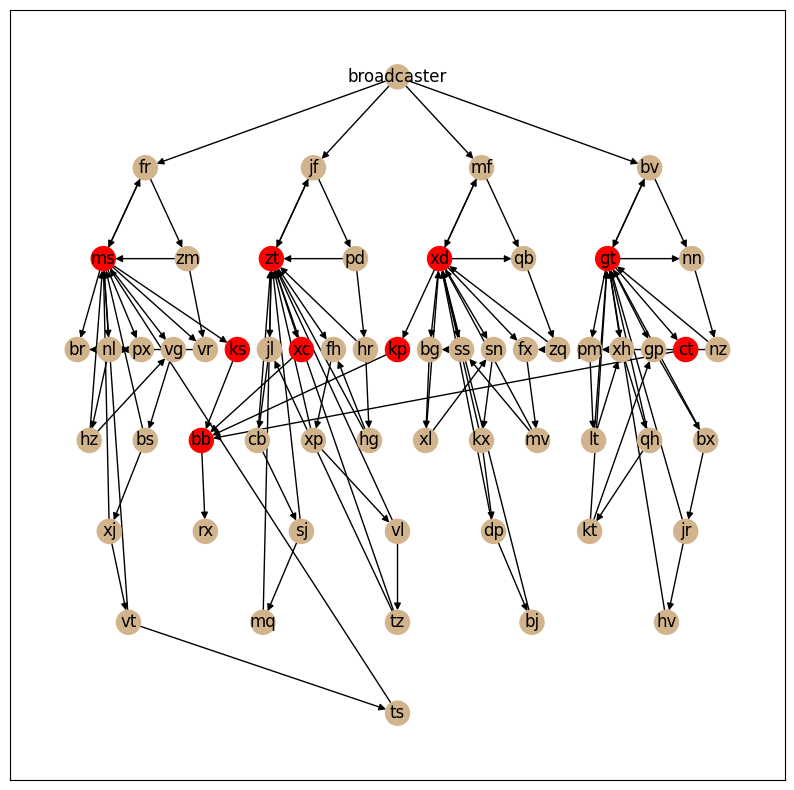

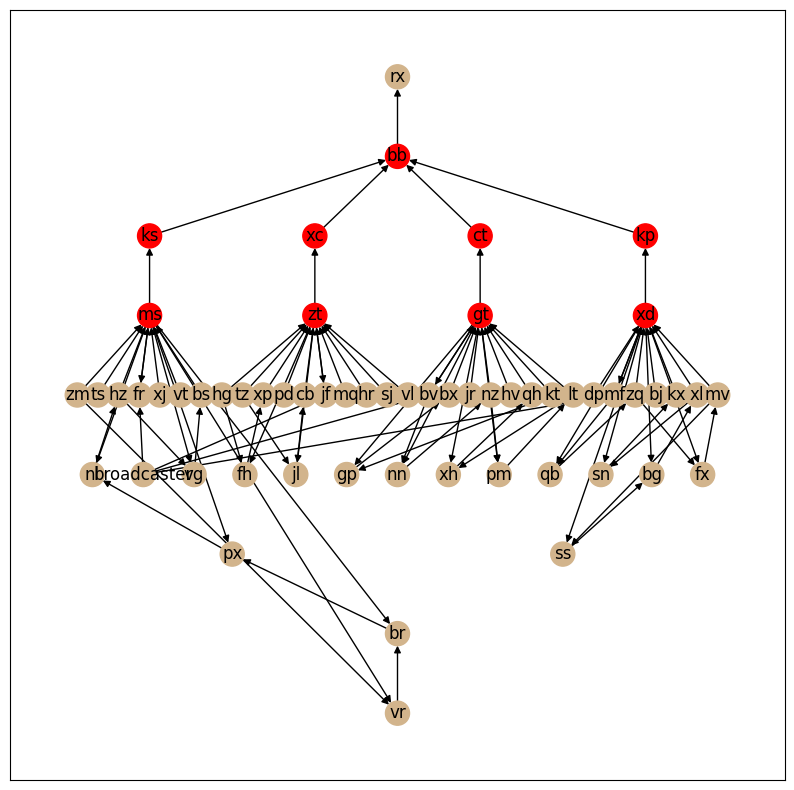

In [58]:
import networkx as nx, matplotlib.pyplot as plt
G=nx.DiGraph()
G.add_nodes_from(names)
G.add_edges_from([
    (src,d)
    for src,dests in destss.items()
    for d in dests
])
for root in ['broadcaster','rx']:
    bfs_nodes=[root]
    depth={root:0}
    for u,v in nx.bfs_edges(G,root,reverse=(root=='rx')):
        depth[v]=depth[u]+1
        bfs_nodes.append(v)
    layers=[[] for d in range(max(depth.values())+1)]
    for v in bfs_nodes:
        layers[depth[v]].append(v)
    pos={}
    for d,verts in enumerate(layers):
        for i,v in enumerate(verts):
            pos[v]=((i+0.5)/len(verts),-d)

    fig,ax=plt.subplots(figsize=(10,10))
    nx.draw_networkx(G,pos=pos,ax=ax,with_labels=True,node_color=[
        'red' if types[v]==CONJ else 'tan'
        for v in G.nodes
    ])

#### hardcoded solution
rx gets low => bb sends low

=> ks,xc,ct,kp all send high

In [95]:
REMOVE={'broadcaster','bb','rx'}
STATELESS='stateless'
FF='%'
CONJ='&'
def parse_module(s):
    modu,dests=s.split(' -> ')
    typ,name=(
        (STATELESS,modu)
        if modu==BROADCAST else
        (modu[0],modu[1:])
    )
    return (
        None if name in REMOVE else
        (typ,name,[tok for tok in dests.split(', ') if tok not in REMOVE])
    )
modules=[e for e in [parse_module(s) for s in LINES()] if e is not None]

names=set([
    name for typ,name,dests in modules
]+[
    d for typ,name,dests in modules for d in dests
])
types={name:STATELESS for name in names}|{name:typ for typ,name,dests in modules}
destss={name:[] for name in names}
inputs={name:[] for name in names}
for typ,name,dests in modules:
    for d in dests:
        destss[name].append(d)
        inputs[d].append(name)

def bfs(v0):
    out=[v0]
    seen={v0}
    i=0
    while i<len(out):
        v=out[i]
        for n in destss[v]:
            if n not in seen:
                seen.add(n)
                out.append(n)
        i+=1
    return out
sec_in2out=dict(zip(['fr','jf','mf','bv'],['ks','xc','kp','ct']))
for ot in sec_in2out.values():
    types[ot]=STATELESS
regions={st:bfs(st) for st in sec_in2out}
assert all(ot in regions[st] for st,ot in sec_in2out.items())
assert all(rm not in R for R in regions.values() for rm in REMOVE)
# display(types,destss,inputs)
# display(regions)
    

LO,HI='lo','hi'
'''
state of a module is a bool for a flip-flop,
    a dict(name:bool) for a conjunction
'''
def press_button(types,destss,state0,button):
    state=dict(state0)
    pulses=[(None,button,LO)]
#     print(state,'\n\t',pulses)
    pi=0
    while pi<len(pulses):
        src,name,val=pulses[pi]
        typ,st0=types[name],state[name]
        if typ==CONJ:
            nst=dict(st0)
            nst[src]=val
            state[name]=nst
            ret=LO if all(mem==HI for mem in nst.values()) else HI
            for d in destss[name]:
                pulses.append((name,d,ret))
        elif typ==FF:
            if val==LO:
                state[name]=not st0
                ret=LO if st0 else HI
                for d in destss[name]:
                    pulses.append((name,d,ret))
        else:
            for d in destss[name]:
                pulses.append((name,d,val))
        pi+=1
    return state,pulses
def default_state(names):
    return {
        name:(
            {inm:False for inm in inputs[name]} if types[name]==CONJ
            else False if types[name]==FF
            else None
        )
        for name in names
    }
def encode_dict(D):
    return tuple(sorted([
        (k,encode_dict(v) if isinstance(v,dict) else v)
        for k,v in D.items()
    ]))

mod_constraints=[]
for button,R in regions.items():
    state,pulses=default_state(R),{}
    hist={}
    back_i=None
    good_idxs=[]
    while True:
        _c=encode_dict(state)
        if _c in hist:
            back_i=hist[_c]
            break
        hist_idx=len(hist)
        hist[_c]=hist_idx
        if sum(
            1 for src,dest,val in pulses
            if dest==sec_in2out[button]
            and val==LO
        )==1:
            good_idxs.append(hist_idx)
        state,pulses=press_button(types,destss,state,button)
    display((len(hist),back_i,good_idxs))
    assert len(good_idxs)==1
    G,=good_idxs
    assert G>=back_i
    '''
    for L=len(hist), B=back_i, [G]=good_idxs
    need x-th elem (0-indexed)
        of sequence 0,1,2,...,B-1, B,B+1,...,L-1, B,B+1,...,L-1, ...
        to be G
    if G>=B, then this means (x-B)%(L-B)+B==G ==> x~G mod (L-B)
    '''
    period=len(hist)-back_i
    mod_constraints.append((G%period,period))
display(mod_constraints)
assert all(r==0 for r,m in mod_constraints)
math.lcm(*[m for r,m in mod_constraints])

(5955, 2048, [3907])

(5871, 2048, [3823])

(5781, 2048, [3733])

(5845, 2048, [3797])

[(0, 3907), (0, 3823), (0, 3733), (0, 3797)]

211712400442661

## Day 19

### 19a

In [25]:
flows,objs=[
    part.split('\n')
    for part in ('\n'.join(LINES())).split('\n\n')
]
def parse_flow(l):
    out=[]
    for tok in l.split(','):
        if ':' in tok:
            condition,ret=tok.split(':')
            attr,cmp,val=None,None,None
            for test_cmp in ['>','<']:
                if test_cmp in condition:
                    cmp=test_cmp
                    attr,val=condition.split(cmp)
                    val=int(val)
                    break
            assert attr is not None, (attr,cmp,val)
            out.append(((attr,cmp,val),ret))
        else:
            out.append(tok)
    return out
def parse_obj(l):
    out={}
    for tok in l[1:-1].split(','):
        attr,val=tok.split('=')
        val=int(val)
        out[attr]=val
    return out
flows=dict(
    l[:-1].split('{')
    for l in flows
)
flows={
    k:parse_flow(v)
    for k,v in flows.items()
}
objs=[parse_obj(l) for l in objs]
flows,objs

def process(flow,obj):
    for (attr,cmp,val),ret in flow[:-1]:
        if {
            '<':(obj[attr]<val),
            '>':(obj[attr]>val)
        }[cmp]:
            return ret
    return flow[-1]
accepts=[]
for obj in objs:
#     print(obj,end='\n\t')
    flow_name='in'
    while flow_name not in {'A','R'}:
#         print(flow_name,end=',')
        flow_name=process(flows[flow_name],obj)
#     print(flow_name)
    if flow_name=='A':
        accepts.append(obj)
accepts
sum(sum(obj.values()) for obj in accepts)

406849

### 19b

In [35]:
flows,objs=[
    part.split('\n')
    for part in ('\n'.join(LINES())).split('\n\n')
]
def parse_flow(l):
    out=[]
    for tok in l.split(','):
        if ':' in tok:
            condition,ret=tok.split(':')
            attr,cmp,val=None,None,None
            for test_cmp in ['>','<']:
                if test_cmp in condition:
                    cmp=test_cmp
                    attr,val=condition.split(cmp)
                    val=int(val)
                    break
            assert attr is not None, (attr,cmp,val)
            out.append(((attr,cmp,val),ret))
        else:
            out.append(tok)
    return out
def parse_obj(l):
    out={}
    for tok in l[1:-1].split(','):
        attr,val=tok.split('=')
        val=int(val)
        out[attr]=val
    return out
flows=dict(
    l[:-1].split('{')
    for l in flows
)
flows={
    k:parse_flow(v)
    for k,v in flows.items()
}
objs=[parse_obj(l) for l in objs]
# display(flows,objs)

'''
return # of combos of attribute values
    that will be accepted
    if we start at flow name fname
    and each attribute a is in the range attr_ranges[a]
        with both endpoints included
'''
def enforced(constraints,branch):
    attr,cmp,val=branch
    lo,hi=constraints[attr]
    if cmp=='<':
        hi=min(hi,val-1)
    elif cmp=='>':
        lo=max(lo,val+1)
    else:
        raise
    nconstraints=dict(constraints)
    nconstraints[attr]=(lo,hi)
    return nconstraints
def branch_not(branch):
    attr,cmp,val=branch
    if cmp=='<':
        return (attr,'>',val-1)
    elif cmp=='>':
        return (attr,'<',val+1)
    else:
        raise

_mem={}
def dp(fname,attr_ranges):
    if fname=='A':
        return math.prod(hi-lo+1 for lo,hi in attr_ranges.values())
    if fname=='R':
        return 0
    state=fname,tuple(sorted(attr_ranges.items()))
    if state in _mem:
        return _mem[state]
    nconstraints=dict(attr_ranges)
    flow=flows[fname]
    out=0
    for branch,ret in flow[:-1]:
        out+=dp(ret,enforced(nconstraints,branch))
        nconstraints=enforced(nconstraints,branch_not(branch))
#     display(nconstraints)
    out+=dp(flow[-1],nconstraints)
    _mem[state]=out
    return out
    
dp('in',{a:(1,4000) for a in ['x','m','a','s']})

138625360533574

## Day 18

### 18a

In [12]:
acts=[]
for l in LINES():
    direc,dist,col=l.split(' ')
    acts.append((direc,int(dist),col[2:-1]))
OFFSET={
    'D':(1,0), 'R':(0,1), 'U':(-1,0), 'L':(0,-1)
}
v0=(0,0)
pts=[]
v=v0
for direc,dist,col in acts:
    r,c=v
    off=OFFSET[direc]
    v=(r+dist*off[0],c+dist*off[1])
    pts.append(v)
assert pts[-1]==v0

def poly_area(coords):
    return sum(
        (y+ny)*(x-nx)
        for (x,y),(nx,ny) in zip(coords,coords[1:]+[coords[0]])
    )/2
loop_len=sum(dist for direc,dist,col in acts)
n_in=abs(poly_area(pts))+1-loop_len/2
n_in+loop_len
# print(abs(poly_area(loop))+1-len(loop)/2)

50746.0

### 18b

In [23]:
acts=[]
for l in LINES():
    col=l.split(' ')[-1][2:-1]
#     print(col)
    dist=int(col[:-1],16)
    direc=['R','D','L','U'][int(col[-1])]
#     print(col,dist,direc)
    acts.append((direc,dist))

OFFSET={
    'D':(1,0), 'R':(0,1), 'U':(-1,0), 'L':(0,-1)
}
v0=(0,0)
pts=[]
v=v0
for direc,dist in acts:
    r,c=v
    off=OFFSET[direc]
    v=(r+dist*off[0],c+dist*off[1])
    pts.append(v)
assert pts[-1]==v0

def poly_area(coords):
    return sum(
        (y+ny)*(x-nx)
        for (x,y),(nx,ny) in zip(coords,coords[1:]+[coords[0]])
    )/2
loop_len=sum(dist for direc,dist in acts)
n_in=abs(poly_area(pts))+1-loop_len/2
n_in+loop_len
# print(abs(poly_area(loop))+1-len(loop)/2)

70086216556038.0

## Day 17

### 17a

In [13]:
grid=[[int(v) for v in l] for l in LINES()]
DR,DC=[1,0,-1,0],[0,1,0,-1]
def solve(grid):
    R,C=len(grid),len(grid[0])
    #don't include start pt unless we enter it again
    cost={(0,0,d):0 for d in range(4)}
    front=set(cost.keys())
    while len(front)>0:
        v=min(front,key=lambda v:cost[v])
        front.remove(v)
        r,c,d=v
        for s in range(1,4):
            nr,nc=r+DR[d]*s,c+DC[d]*s
            if 0<=nr and nr<R and 0<=nc and nc<C:
                ncost=cost[v]+sum(
                    grid[r+DR[d]*i][c+DC[d]*i]
                    for i in range(1,s+1)
                )
                for rot in [-1,1]:
                    nd=(d+rot)%4
                    nv=(nr,nc,nd)
                    if ncost<cost.get(nv,float('inf')):
                        cost[nv]=ncost
                        front.add(nv)
#     display(cost)
#     display(R,C,[cost.get((R-1,C-1,d),float('inf')) for d in range(4)])
#     path=[]
#     v=min([(R-1,C-1,d) for d in range(4)],key=lambda v:cost.get(v,float('inf')))
#     display(v)
#     while v!=0:
        
    return min(cost.get((R-1,C-1,d),float('inf')) for d in range(4))
solve(grid)

967

### 17b

In [16]:
grid=[[int(v) for v in l] for l in LINES()]
DR,DC=[1,0,-1,0],[0,1,0,-1]
def solve(grid):
    R,C=len(grid),len(grid[0])
    #don't include start pt unless we enter it again
    cost={(0,0,d):0 for d in range(4)}
    front=set(cost.keys())
    while len(front)>0:
        v=min(front,key=lambda v:cost[v])
        front.remove(v)
        r,c,d=v
        for s in range(4,11):
            nr,nc=r+DR[d]*s,c+DC[d]*s
            if 0<=nr and nr<R and 0<=nc and nc<C:
                ncost=cost[v]+sum(
                    grid[r+DR[d]*i][c+DC[d]*i]
                    for i in range(1,s+1)
                )
                for rot in [-1,1]:
                    nd=(d+rot)%4
                    nv=(nr,nc,nd)
                    if ncost<cost.get(nv,float('inf')):
                        cost[nv]=ncost
                        front.add(nv)
    return min(cost.get((R-1,C-1,d),float('inf')) for d in range(4))
solve(grid)

1101

## Day 16

### 16a

In [16]:
grid=LINES()
def transform(obj,od):
    if obj=='.':
        return [od]
    elif obj=='/':
        return [[1,0,3,2][od]]
    elif obj=='\\':
        return [[3,2,1,0][od]]
    elif obj=='-':
        return [[0],[0,2],[2],[0,2]][od]
    elif obj=='|':
        return [[1,3],[1],[1,3],[3]][od]
    else:
        raise
    
def beam_region(grid):
    R,C=len(grid),len(grid[0])
    DR,DC=[0,-1,0,1],[1,0,-1,0]
    #(r,c,d)=at loc (r,c) in dir d
    seen=set()
    front=[]
    for d in transform(grid[0][0],0):
        v=(0,0,d)
        seen.add(d)
        front.append(v)
    i=0
    while i<len(front):
        r,c,d=front[i]
        nr,nc=r+DR[d],c+DC[d]
        if 0<=nr and nr<R and 0<=nc and nc<C:
            obj=grid[nr][nc]
#             nds=None
#             if obj=='.':
#                 nds=d
#             elif obj=='/':
#                 nds=[1,0,3,2][d]
#             elif obj=='\\':
#                 nds=[3,2,1,0][d]
#             elif obj=='-':
#                 nds=[[0],[0,2],[2],[0,2]][d]
#             elif obj=='|':
#                 nds=[[1,3],[1],[1,3],[3]][d]
#             else:
#                 raise
            nds=transform(obj,d)
            if isinstance(nds,int):
                nds=[nds]
            for nd in nds:
                nv=(nr,nc,nd)
                if nv not in seen:
                    seen.add(nv)
                    front.append(nv)
        i+=1
    return front
R,C=len(grid),len(grid[0])
region=beam_region(grid)
cnt=[[0]*C for _ in range(R)]
for r,c,d in region:
    cnt[r][c]+=1
# print('\n'.join(''.join(str({0:'.',1:'#'}.get(v,v)) for v in row) for row in cnt))
len(set((r,c) for r,c,d in region))

6978

### 16b

In [20]:
grid=LINES()
def transform(obj,od):
    if obj=='.':
        return [od]
    elif obj=='/':
        return [[1,0,3,2][od]]
    elif obj=='\\':
        return [[3,2,1,0][od]]
    elif obj=='-':
        return [[0],[0,2],[2],[0,2]][od]
    elif obj=='|':
        return [[1,3],[1],[1,3],[3]][od]
    else:
        raise
    
def beam_region(grid,r0,c0,d0):
    R,C=len(grid),len(grid[0])
    DR,DC=[0,-1,0,1],[1,0,-1,0]
    #(r,c,d)=at loc (r,c) in dir d
    seen=set()
    front=[]
    for d in transform(grid[r0][c0],d0):
        v=(r0,c0,d)
        seen.add(d)
        front.append(v)
    i=0
    while i<len(front):
        r,c,d=front[i]
        nr,nc=r+DR[d],c+DC[d]
        if 0<=nr and nr<R and 0<=nc and nc<C:
            obj=grid[nr][nc]
            nds=transform(obj,d)
            if isinstance(nds,int):
                nds=[nds]
            for nd in nds:
                nv=(nr,nc,nd)
                if nv not in seen:
                    seen.add(nv)
                    front.append(nv)
        i+=1
    return front
def coverage(region):
    return len(set((r,c) for r,c,d in region))
R,C=len(grid),len(grid[0])
max([
    v
    for r in range(R)
    for v in [
        coverage(beam_region(grid,r,0,0)),
        coverage(beam_region(grid,r,C-1,2)),
    ]
]+[
    v
    for c in range(C)
    for v in [
        coverage(beam_region(grid,0,c,3)),
        coverage(beam_region(grid,R-1,c,1)),
    ]
])

7315

## Day 15

### 15a

In [8]:
toks=LINES()[0].split(',')
def H(s):
    out=0
    for ch in s:
        out=( (out+ord(ch))*17 ) % 256
    return out
sum(H(s) for s in toks)
# for s in toks:
#     print(s,H(s))

504449

### 15b

In [18]:
toks=LINES()[0].split(',')
def H(s):
    out=0
    for ch in s:
        out=( (out+ord(ch))*17 ) % 256
    return out

boxes=[[] for _ in range(256)]
for s in toks:
    label,action=None,None
    if s.find('=')>=0:
        label,action=s.split('=')
        action=int(action)
    else:
        assert s[-1]=='-'
        label,action=s[:-1],'-'
    # print(s,label,action,H(label))
    h=H(label)
    box=boxes[h]
    if action=='-':
        for i in range(len(box)-1,-1,-1):
            if box[i][0]==label:
                del box[i]
    else:
        done=False
        for i in range(len(box)):
            if box[i][0]==label:
                box[i]=(label,action)
                done=True
                break
        if not done:
            box.append((label,action))
#     display({i:box for i,box in enumerate(boxes) if len(box)>0})
sum((bi+1)*(i+1)*boxes[bi][i][1] for bi in range(len(boxes)) for i in range(len(boxes[bi])))

262044

## Day 14

### 14a

In [50]:
grid=LINES()
def rnorth(grid):
    R,C=len(grid),len(grid[0])
    out=[['.']*C for r in range(R)]
    for c in range(C):
        roll_i=0
        for r in range(R):
            if grid[r][c]=='#':
                out[r][c]='#'
                roll_i=r+1
            elif grid[r][c]=='O':
                out[roll_i][c]='O'
                roll_i+=1
    return out
def load(grid):
    R,C=len(grid),len(grid[0])
    return sum(
        R-r
        for r in range(R)
        for c in range(C)
        if grid[r][c]=='O'
    )
load(rnorth(grid))

113078

### 14b

In [75]:
grid=LINES()
def rnorth(grid):
    R,C=len(grid),len(grid[0])
    out=[['.']*C for r in range(R)]
    for c in range(C):
        roll_i=0
        for r in range(R):
            if grid[r][c]=='#':
                out[r][c]='#'
                roll_i=r+1
            elif grid[r][c]=='O':
                out[roll_i][c]='O'
                roll_i+=1
    return out
def rsouth(grid):
    return rnorth(grid[::-1])[::-1]
def rwest(grid):
    R,C=len(grid),len(grid[0])
    out=[['.']*C for r in range(R)]
    for r in range(R):
        roll_i=0
        for c in range(C):
            ch=grid[r][c]
            if ch=='#':
                out[r][c]='#'
                roll_i=c+1
            elif ch=='O':
                out[r][roll_i]='O'
                roll_i+=1
    return out
def rrev(grid):
    return [row[::-1] for row in grid]
def reast(grid):
    return rrev(rwest(rrev(grid)))
def spin(grid):
    return reast(rsouth(rwest(rnorth(grid))))
def load(grid):
    R,C=len(grid),len(grid[0])
    return sum(
        R-r
        for r in range(R)
        for c in range(C)
        if grid[r][c]=='O'
    )
def encode(grid):
    return '\n'.join(''.join(list(row)) for row in grid)

# display(grid)

hist={encode(grid):0}
M=grid
back_i=None
for _ in range(1000):
    M=spin(M)
    c=encode(M)
    if c in hist:
        back_i=hist[c]
        break
    hist[c]=len(hist)
#     display([''.join(row) for row in M])

'''
find t-th term (0-indexed) in sequence
0,1,...,h-1, b,b+1,...,h-1, b,b+1,...,h-1, ...
'''
def solve(h,b,t):
    print(h,b,t)
    if t<h:
        return t
    period=h-b
#     print(period)
    return ((t-h)%period)+b
ans_i=solve(len(hist),back_i,10**9)
hist_list={i:v for v,i in hist.items()}
def to_grid(code):
    return code.split('\n')
load(to_grid(hist_list[ans_i]))

117 103 1000000000


94255

## Day 13

### 13a

In [26]:
def is_refl(vs,i):
    if i<0 or i+1>=len(vs):
        return False
    l,r=i,i+1
    while l>=0 and r<len(vs):
        if vs[l]!=vs[r]:
            return False
        l-=1
        r+=1
    return True
def pts(rows):
    R,C=len(rows),len(rows[0])
    clms=[''.join(rows[r][c] for r in range(R)) for c in range(C)]
    ris=[r for r in range(R) if is_refl(rows,r)]
    cis=[c for c in range(C) if is_refl(clms,c)]
    assert len(ris)+len(cis)==1, (ris,cis)
#     print(ris,cis)
    return 100*(ris[0]+1) if len(ris)>0 else (cis[0]+1)

grids=[tok.split('\n') for tok in '\n'.join(LINES()).split('\n\n')]
grids

sum([pts(M) for M in grids])

33195

### 13b

In [44]:
def is_refl(vs,i):
    if i<0 or i+1>=len(vs):
        return False
    l,r=i,i+1
    while l>=0 and r<len(vs):
        if vs[l]!=vs[r]:
            return False
        l-=1
        r+=1
    return True
def refl_coords(rows):
    R,C=len(rows),len(rows[0])
    clms=[''.join(rows[r][c] for r in range(R)) for c in range(C)]
    ris=[r for r in range(R) if is_refl(rows,r)]
    cis=[c for c in range(C) if is_refl(clms,c)]
    return ris,cis
def smudge(rows):
    R,C=len(rows),len(rows[0])
    refls=refl_coords(rows)
    out=None
    b_unseen_refls=None
    for r in range(R):
        for c in range(C):
            M=[list(row) for row in rows]
            M[r][c]=('#' if M[r][c]=='.' else '.')
            M=[''.join(row) for row in M]
            nris,ncis=refl_coords(M)
            if len(set(nris)-set(refls[0]))>0 or len(set(ncis)-set(refls[1]))>0:
#                 print(r,c,refls,nris,ncis)
                unseens=(set(nris)-set(refls[0]),set(ncis)-set(refls[1]))
                if b_unseen_refls is None:
                    b_unseen_refls=unseens
                assert b_unseen_refls==unseens
                assert len(unseens[0])+len(unseens[1])==1
                out=list([100*(v+1) for v in unseens[0]]+[v+1 for v in unseens[1]])[0]
    assert out is not None
    return out

grids=[tok.split('\n') for tok in '\n'.join(LINES()).split('\n\n')]
grids

sum([smudge(M) for M in grids])

31836

## Day 12

### 12a

In [42]:
masks,runss=[],[]
for l in LINES():
    m,rs=l.split()
    masks.append(m)
    runss.append([int(v) for v in rs.split(',')])
masks,runss
def get_runs(s):
    c_='#'
    out=[]
    i=0
    while i<len(s):
        if s[i]==c_:
            j=i
            while j<len(s) and s[j]==c_:
                j+=1
            out.append(j-i)
            i=j
        else:
            i+=1
    return out
ans=0
for m,rs in zip(masks,runss):
    idxs=[c for c in range(len(m)) if m[c]=='?']
#     print(m,rs,idxs)
    cnt=0
    for states in it.product(['.','#'],repeat=len(idxs)):
        nm=list(m)
        for i,v in zip(idxs,states):
            nm[i]=v
        nm=''.join(nm)
#         print('\t',states,nm,get_runs(nm))
        if get_runs(nm)==rs:
            cnt+=1
#     print(cnt)
    ans+=cnt
ans

7792

### 12b

In [41]:
masks,runss=[],[]
for l in LINES():
    m,rs=l.split()
    masks.append(m)
    runss.append([int(v) for v in rs.split(',')])
masks,runss

C_='#'
def get_runs(s):
    out=[]
    i=0
    while i<len(s):
        if s[i]==C_:
            j=i
            while j<len(s) and s[j]==C_:
                j+=1
            out.append(j-i)
            i=j
        else:
            i+=1
    return out

def dp(M,runs):
    runs=tuple(runs)
    mem={}
    def solve(M,runs,ntrailing):
        out=None
        state=(M,runs,ntrailing)
        if state in mem:
            out=mem[state]
        else:
            if M=='':
                out=1 if runs==(tuple() if ntrailing==0 else (ntrailing,)) else 0
            elif M[-1]=='#':
                out=solve(M[:-1],runs,ntrailing+1)
            elif M[-1]=='.':
                if ntrailing==0:
                    out=solve(M[:-1],runs,0)
                else:
                    out=solve(M[:-1],runs[:-1],0) if len(runs)>0 and runs[-1]==ntrailing else 0
            else:
                assert M[-1]=='?'
                out=solve(M[:-1]+'.',runs,ntrailing)+solve(M[:-1]+'#',runs,ntrailing)
#             print('\t',M,runs,ntrailing,':',out)
        mem[state]=out
        return out
#     display(mem)
    return solve(M,runs,0)

ans=0
for m,rs in zip(masks,runss):
    cnt=dp('?'.join([m]*5),rs*5)
#     print(cnt)
    ans+=cnt
ans

13012052341533

## Day 11

### 11a

In [18]:
grid=LINES()
R,C=len(grid),len(grid[0])
pts=[(r,c) for r in range(R) for c in range(C) if grid[r][c]=='#']
ptrs,ptcs={r for r,c in pts},{c for r,c in pts}
rgaps,cgaps=[r for r in range(R) if r not in ptrs],[c for c in range(C) if c not in ptcs]
# display(rgaps,cgaps)
# xgrow,cgrow=[(1 if r in ptrs else 2) for r in range(R)],[(1 if c in ptcs else 2) for c in range(C)]
# xgrow,cgrow
def expand(A):
    A=set(A)
    A.add(0)
    A=sorted(A)
    out={}
    pad=0
    for i in range(len(A)):
        a=A[i]
        if i>0 and A[i]-A[i-1]>1:
            pad+=(A[i]-A[i-1])-1
        out[a]=a+pad
    return out
rM,cM=expand(ptrs),expand(ptcs)
npts=[(rM[r],cM[c]) for r,c in pts]
def dist(p0,p1):
    return sum(abs(p0[i]-p1[i]) for i in range(2))
sum(dist(p0,p1) for p0,p1 in it.combinations(npts,2))

9608724

### 11b

In [39]:
grid=LINES()
R,C=len(grid),len(grid[0])
pts=[(r,c) for r in range(R) for c in range(C) if grid[r][c]=='#']
ptrs,ptcs={r for r,c in pts},{c for r,c in pts}
rgaps,cgaps=[r for r in range(R) if r not in ptrs],[c for c in range(C) if c not in ptcs]
# display(rgaps,cgaps)
G=10**6
xgrow=np.array([(1 if r in ptrs else G) for r in range(R)])
cgrow=np.array([(1 if c in ptcs else G) for c in range(C)])
nxs,ncs=np.cumsum(xgrow)-1,np.cumsum(cgrow)-1
xgrow,cgrow,nxs,ncs
npts=[(nxs[r],ncs[c]) for r,c in pts]
# display(npts)
def dist(p0,p1):
    return sum(abs(p0[i]-p1[i]) for i in range(2))
sum(dist(p0,p1) for p0,p1 in it.combinations(npts,2))

904633799472

## Day 10

### 10a

In [44]:
grid=LINES()
dcoordss={
    '|':[(1,0),(-1,0)],
    '-':[(0,1),(0,-1)],
    'L':[(-1,0),(0,1)],
    'J':[(-1,0),(0,-1)],
    '7':[(1,0),(0,-1)],
    'F':[(1,0),(0,1)],
}
def grid2graph(grid):
    graph={}
    R,C=len(grid),len(grid[0])
    for r in range(R):
        for c in range(C):
            t=grid[r][c]
            neighbors=[]
            for dr,dc in dcoordss.get(t,[]):
                nr,nc=r+dr,c+dc
                if 0<=nr and nr<R and 0<=nc and nc<C:
                    neighbors.append((nr,nc))
            if len(neighbors)>0:
                graph[(r,c)]=neighbors
    return graph
G=grid2graph(grid)

R,C=len(grid),len(grid[0])
starts=[(r,c) for r in range(R) for c in range(C) if grid[r][c]=='S']
assert len(starts)==1
(sr,sc)=starts[0]
# display(G)
G[(sr,sc)]=[(r,c) for (r,c) in G if (sr,sc) in G[(r,c)]]
# display(G)

def bfs(G,v0):
    out=[v0]
    depths={v0:0}
    i=0
    while i<len(out):
        v=out[i]
        for n in G[v]:
            if n not in depths:
                depths[n]=depths[v]+1
                out.append(n)
        i+=1
    return depths
print(max(bfs(G,(sr,sc)).values()))

80


### 10b

In [75]:
grid=LINES()
dcoordss={
    '|':[(1,0),(-1,0)],
    '-':[(0,1),(0,-1)],
    'L':[(-1,0),(0,1)],
    'J':[(-1,0),(0,-1)],
    '7':[(1,0),(0,-1)],
    'F':[(1,0),(0,1)],
    '.':[(1,0),(-1,0),(0,1),(0,-1)]
}
def neighbors_of(R,C,r,c,dcs):
    out=[]
    for dr,dc in dcs:
        nr,nc=r+dr,c+dc
        if 0<=nr and nr<R and 0<=nc and nc<C:
            out.append((nr,nc))
    return out
def grid2graph(grid):
    graph={}
    R,C=len(grid),len(grid[0])
    for r in range(R):
        for c in range(C):
            t=grid[r][c]
            neighbors=[]
#             for dr,dc in dcoordss.get(t,[]):
#                 nr,nc=r+dr,c+dc
#                 if (0<=nr and nr<R and 0<=nc and nc<C
#                     and (t!='.' or grid[nr][nc]=='.')):
#                     neighbors.append((nr,nc))
            for nr,nc in neighbors_of(R,C,r,c,dcoordss.get(t,[])):
                if t!='.' or grid[nr][nc]=='.':
                    neighbors.append((nr,nc))
            if len(neighbors)>0:
                graph[(r,c)]=neighbors
    return graph
G=grid2graph(grid)

R,C=len(grid),len(grid[0])
starts=[(r,c) for r in range(R) for c in range(C) if grid[r][c]=='S']
assert len(starts)==1
(sr,sc)=starts[0]
# display(G)
G[(sr,sc)]=[(r,c) for (r,c) in G if (sr,sc) in G[(r,c)]]
start_typs=[typ for typ,dcs in dcoordss.items() if set(G[(sr,sc)])==set(neighbors_of(R,C,sr,sc,dcs))]
assert len(start_typs)
start_typ,=start_typs
print('start joint:',start_typ)
# display(G)

def dfs(G,v0):
    # max recursion depth exceeded
#     seen={v0}
#     seen_l=[v0]
#     def _dfs(v):
#         for n in G[v]:
#             if n not in seen:
#                 seen.add(n)
#                 seen_l.append(n)
#                 _dfs(n)
#     _dfs(v0)
#     return seen_l
    stack=[(v0,0)]
    out=[]
    seen={v0}
    while len(stack)>0:
        si=len(stack)-1
        v,ni=stack[si]
        if ni==0:
            out.append(v)
        if ni==len(G[v]):
            del stack[-1]
        else:
            n=G[v][ni]
            if n not in seen:
                seen.add(n)
                stack.append((n,0))
            ni+=1
            stack[si]=(v,ni)
    return out
loop=dfs(G,(sr,sc))

isolate=[
    [
        grid[r][c] if (r,c) in loop else '.'
        for c in range(C)
    ]
    for r in range(R)
]
isolate[sr][sc]=start_typ
# print('\n'.join(''.join(row) for row in isolate))
# print()
# print(loop)

#shoelace formula + Pick's theorem
def poly_area(coords):
    return sum(
        (y+ny)*(x-nx)
        for (x,y),(nx,ny) in zip(coords,coords[1:]+[coords[0]])
    )/2
print(abs(poly_area(loop))+1-len(loop)/2)

# def n_in(grid):
#     exteriors={}
#     R,C=len(grid),len(grid[0])
#     G=grid2graph(grid)
#     for r in range(R):
#         for c in range(C):
#             if r==0 or r==R-1 or c==0 or c==C-1:
#                 if (r,c) not in exteriors:
#                     exteriors.update(bfs(G,(r,c)))
# #     for r in range(R):
# #         for c in range(C):
# #             print((grid[r][c] if grid[r][c]!='.' else 'O' if (r,c) in exteriors else 'I'),end='')
# #         print()
#     return sum(
#         1
#         for r in range(R) for c in range(C)
#         if grid[r][c]=='.' and (r,c) not in exteriors
#     )
# def n_in(grid):
#     R,C=len(grid),len(grid[0])
#     for r in range(R):
#         cnt=0
#         for c in range(C):
#             cnt+=(0 if grid[r][c] in {'.','-'} else 1)
#             print((grid[r][c] if grid[r][c]!='.' else 'O' if cnt%2==0 else 'I'),end='')
#         print()
# n_in(isolate)

start joint: L
371.0


## Day 9

### 9a

In [113]:
seqs=[[int(v) for v in l.split()] for l in LINES()]

def solve(seq):
    diffss=[seq]
    H=seq
    while any(v!=0 for v in H):
        assert len(H)>0
        H=[H[i+1]-H[i] for i in range(len(H)-1)]
        diffss.append(H)
    # display(diffss)
    diffss[-1].append(0)
    for lvl in range(len(diffss)-2,-1,-1):
        diffss[lvl].append(diffss[lvl][-1]+diffss[lvl+1][-1])
    # display(diffss)
    return diffss[0][-1]
sum(solve(S) for S in seqs)

1861775706

### 9b

In [121]:
seqs=[[int(v) for v in l.split()] for l in LINES()]

def solve(seq):
    diffss=[seq]
    H=seq
    while any(v!=0 for v in H):
        assert len(H)>0
        H=[H[i+1]-H[i] for i in range(len(H)-1)]
        diffss.append(H)
    # display(diffss)
    diffss[-1].insert(0,0)
    for lvl in range(len(diffss)-2,-1,-1):
        diffss[lvl].insert(0,diffss[lvl][0]-diffss[lvl+1][0])
    # display(diffss)
    return diffss[0][0]
sum(solve(S) for S in seqs)

1082

## Day 8

### 8a

In [63]:
lines=LINES()
instr=lines[0]
ways={}
for l in lines[2:]:
    v,data=l.split(' = ')
    vl,vr=data[1:-1].split(', ')
    ways[v]=(vl,vr)

n=0
v='AAA'
while v!='ZZZ':
    d=instr[n%len(instr)]
    v=ways[v][0 if d=='L' else 1]
    n+=1
n

19783

### 8b

In [106]:
lines=LINES()
instr=lines[0]
ways={}
for l in lines[2:]:
    v,data=l.split(' = ')
    vl,vr=data[1:-1].split(', ')
    ways[v]=(vl,vr)

loops=[]
for v0 in ways:
    if v0[-1]=='A':
        start=(v0,0)
        seen={start:0}
        s=start
        iback=None
        while True:
            v,i=s
            d=instr[i]
            s=(ways[v][0 if d=='L' else 1],(i+1)%len(instr))
            if s in seen:
                iback=seen[s]
                break
            seen[s]=len(seen)
        seen_list={i:s for s,i in seen.items()}
        loops.append((
            seen_list,
            iback
        ))
'''
loop=(L,b)
locations: L[0],L[1],...,L[len(L)-1],L[b],L[b+1],...
    0<=i<len(L): at location L[i] at step i
    larger i: at location L[b + (i-len(L))%(len(L)-b)]
'''
# display(loops)

def loc_at_step(L,b,i):
    n=len(L)
    return L[i] if i<n else L[b + (i-n)%(n-b)]

for i in range(max(len(L) for L,b in loops)):
    # print([loc_at_step(L,b,i) for L,b in loops])
    if all(loc_at_step(L,b,i)[0][-1]=='Z' for L,b in loops):
        print(i)
        break

'''
find some i>len(L_k) for all (L_k,b_k) in loops
s.t. all L_k[b_k + (i-len(L_k))%(len(L_k)-b_k)] end with letter Z
'''
Z_idxs=[
    [idx for idx in range(len(L)) if L[idx][0][-1]=='Z']
    for L,b in loops
]
Z_idxs

def gcd(a,b):
    return gcd(b,a) if a>b else b if a==0 else gcd(a,b%a)
def congruence_pair(r1,m1, r2,m2):
    if m1<m2:
        return congruence_pair(r2,m2, r1,m1)
    r1%=m1
    r2%=m2
    M=(m1*m2)//gcd(m1,m2)
    # find k1 s.t. m1*k1+r1 ~ r2 mod m2
    for k1 in range(M//m1):
        i=m1*k1+r1
        if i%m2 == r2:
            return i,M
    return None

sol_i,sol_M=0,1
for zidx_list in it.product(*Z_idxs):
    print(zidx_list)
    for zidx,(L,b) in zip(zidx_list,loops):
        n=len(L)
        # need (i-n)%(n-b) + b == zidx
        # ==> i ~ (zidx-b)+n mod n-b
        # ==> i = (n-b)*m + (zidx-b) for some m
        print(n,b, f'need i%{n-b}={zidx-b+n}')
        sol_i,sol_M=congruence_pair(sol_i,sol_M, zidx-b+n,n-b)
sol_i,sol_M

(11653, 19783, 19241, 16531, 12737, 14363)
11657 4 need i%11653=23306
19785 2 need i%19783=39566
19245 4 need i%19241=38482
16535 4 need i%16531=33062
12743 6 need i%12737=25474
14365 2 need i%14363=28726


(0, 9177460370549)

## Day 7

### 7a

In [46]:
card2val={
    c:i+1
    for i,c in enumerate('123456789TJQKA')
}
hands,bids=[],{}
for l in LINES():
    h,b=l.split(' ')
    h=tuple(card2val[c] for c in h)
    hands.append(h)
    bids[h]=int(b)
assert len(set(hands))==len(hands)

def ctype(h):
    mset={}
    for c in h:
        mset[c]=mset.get(c,0)+1
    freqs=sorted(mset.values())
    if freqs[-1]==3:
        return 3.5 if len(freqs)>1 and freqs[-2]==2 else 3
    if freqs[-1]==2:
        return 2.5 if len(freqs)>1 and freqs[-2]==2 else 2
    return freqs[-1]

A=sorted(sorted(hands),key=ctype)
sum(bids[h]*(i+1) for i,h in enumerate(A))#,A

249483956

### 7b

In [55]:
card2val={
    c:i
    for i,c in enumerate('J123456789T.QKA')
}
hands,bids=[],{}
for l in LINES():
    h,b=l.split(' ')
    h=tuple(card2val[c] for c in h)
    hands.append(h)
    bids[h]=int(b)
assert len(set(hands))==len(hands)

def ctype(h):
    mset={}
    for c in h:
        if c!=0:
            mset[c]=mset.get(c,0)+1
    freqs=sorted(mset.values())
    if len(freqs)==0:
        freqs=[len(h)]
    else:
        freqs[-1]+=sum(1 for c in h if c==0)
#     print(h,freqs)
    if freqs[-1]==3:
        return 3.5 if len(freqs)>1 and freqs[-2]==2 else 3
    if freqs[-1]==2:
        return 2.5 if len(freqs)>1 and freqs[-2]==2 else 2
    return freqs[-1]

A=sorted(sorted(hands),key=ctype)
sum(bids[h]*(i+1) for i,h in enumerate(A))#,[(h,ctype(h)) for h in A]

252137472

## Day 6

### 6a

In [11]:
Ts,Ds=[
    [int(tok) for tok in l.split(':')[1].split()]
    for l in LINES()
]
out=1
for t,d in zip(Ts,Ds):
    nways=sum(1 for bt in range(t+1) if (t-bt)*bt>d)
    out*=nways
out

2612736

### 6b

In [17]:
T,D=[
    int(''.join(l.split(':')[1].split()))
    for l in LINES()
]
T,D

'''
(T-x)*x > D
x**2 - Tx < -D
x**2 - Tx + D < 0
(T +/- sqrt(T**2 - 4D)) / 2
'''
hi,lo=[(T+e*(T**2-4*D)**0.5)/2 for e in [1,-1]]
int(hi)-math.ceil(lo)+1

29891250

## Day 5

### 5a

In [19]:
sections='\n'.join(LINES()).split('\n\n')
seeds=[int(tok) for tok in sections[0].split(': ')[1].split(' ')]

def conversion(s):
    rng_strs=s.split(':\n')[1].split('\n')
#     out={}
#     for tok in rng_strs:
#         dest,src,le=(int(v) for v in tok.split())
#         for i in range(le):
#             assert src+i not in out
#             out[src+i]=dest+i
#     return out
    return [tuple(int(v) for v in tok.split()) for tok in rng_strs]
def convert(rngs,v):
    for dest,src,le in rngs:
        if src<=v and v<src+le:
            return dest+(v-src)
    return v

Ds=[conversion(sec) for sec in sections[1:]]
vals=seeds
for D in Ds:
    vals=[convert(D,v) for v in vals]
min(vals)

51580674

### 5b

In [34]:
sections='\n'.join(LINES()).split('\n\n')
seed_data=[int(tok) for tok in sections[0].split(': ')[1].split(' ')]

def conversion(s):
    rng_strs=s.split(':\n')[1].split('\n')
    out=[]
    for tok in rng_strs:
        dest,src,le=(int(v) for v in tok.split())
        out.append((src,src+le,dest-src))
    return out

Ds=[conversion(sec) for sec in sections[1:]]
seed_rngs=[(src,src+le) for src,le in zip(seed_data[::2],seed_data[1::2])]

# if x in range (dest,src,le): x -> x+(dest-src)
#  src <= x < src+le

def convert_range(start,converters):
#     print(start,converters)
    # assume that converters operate over disjoint ranges
    converters=sorted(converters,key=lambda rng:rng[1])
    _clo,_chi=converters[0][0],converters[-1][1]
    _lo,_hi=min(start[0],_clo),max(start[1],_chi)
    converters=[(_lo,_clo,0)]+converters+[(_chi,_hi,0)]
    id_rngs=[
        (h0,l1,0)
        for (l0,h0,sh0),(l1,h1,sh1) in zip(converters,converters[1:])
    ]
    converters=sorted(converters+id_rngs,key=lambda rng:rng[1])
#     print(converters)
    out=[]
    for clo,chi,sh in converters:
        alo,ahi=max(start[0],clo),min(start[1],chi)
#         print(f'\t{[alo,ahi]}')
        if alo<ahi:
            out.append(
                (alo+sh,ahi+sh)
            )
    return out

rngs=seed_rngs
for D in Ds:
    rngs=[nrng for rng in rngs for nrng in convert_range(rng,D)]
#     print(rngs)
min(lo for lo,hi in rngs)#,rngs

99751240

## Day 4

### 4a

In [14]:
cards=[
    tuple(
        [int(v) for v in tok.split()]
        for tok in l.split(': ')[1].split(' | ')
    )
    for l in LINES()
]
# display(cards)
out=0
for wins,yours in cards:
    cnt=sum(1 for v in yours if v in wins)
    out+=2**(cnt - 1) if cnt>0 else 0
out

17782

### 4b

In [17]:
cards=[
    tuple(
        [int(v) for v in tok.split()]
        for tok in l.split(': ')[1].split(' | ')
    )
    for l in LINES()
]
N=len(cards)
mults=[1]*N
for i,(wins,yours) in enumerate(cards):
    cnt=sum(1 for v in yours if v in wins)
    for k in range(cnt):
        mults[i+k+1]+=mults[i]
sum(mults)

8477787

## Day 3

### 3a

In [10]:
grid=LINES()
# print(grid)
R,C=len(grid),len(grid[0])
adj=[[False]*C for r in range(R)]
dirs=[
    (1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1)
]
for r in range(R):
    for c in range(C):
        s=grid[r][c]
        if s not in '.1234567890':
            for dr,dc in dirs:
                nr,nc=r+dr,c+dc
                if 0<=nr and nr<R and 0<=nc and nc<C:
                    adj[nr][nc]=True

good_nums=[]
for r in range(R):
    j=0
    while j<C:
        if grid[r][j] in '1234567890':
            k=j
            while k<C and grid[r][k] in '1234567890':
                k+=1
#             print(j,k,grid[r][j:k])
            if any(adj[r][i] for i in range(j,k)):
                good_nums.append(int(grid[r][j:k]))
            j=k
        else:
            j+=1
# print(good_nums)
sum(good_nums)

537832

### 3b

In [18]:
grid=LINES()
# print(grid)
R,C=len(grid),len(grid[0])
num_idx=[[None]*C for r in range(R)]
num_vals={}
for r in range(R):
    j=0
    while j<C:
        if grid[r][j] in '1234567890':
            k=j
            while k<C and grid[r][k] in '1234567890':
                k+=1
            n_id=len(num_vals)
            n_v=int(grid[r][j:k])
            num_vals[n_id]=n_v
            for i in range(j,k):
                num_idx[r][i]=n_id
            j=k
        else:
            j+=1

# display(num_idx)

dirs=[
    (1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1)
]
rats=[]
for r in range(R):
    for c in range(C):
        s=grid[r][c]
        if s=='*':
            n_ids=set()
            for dr,dc in dirs:
                nr,nc=r+dr,c+dc
                if 0<=nr and nr<R and 0<=nc and nc<C:
                    n_id=num_idx[nr][nc]
                    if n_id is not None:
                        n_ids.add(n_id)
            if len(n_ids)==2:
                rats.append(math.prod(num_vals[n_id] for n_id in n_ids))
sum(rats)#,rats

81939900

## Day 2

### 2a

In [59]:
games=[s[s.find(' '):] for s in LINES()]
allow={'red':12, 'green':13, 'blue':14}
out=0
for G in games:
    gi,G=G.split(': ')
    gi=int(gi)
    G=G.split('; ')
#     print(gi,G)
    ssets=[]
    for s in G:
        D={}
        for tok in s.split(', '):
            cnt,col=tok.split(' ')
            D[col]=int(cnt)
        ssets.append(D)
    bnd={}
    for D in ssets:
        for col,v in D.items():
            bnd[col]=max(bnd.get(col,0),v)
    if all(bnd[c]<=allow[c] for c in allow):
#         print(bnd)
        out+=gi
out

2632

### 2b

In [60]:
games=[s[s.find(' '):] for s in LINES()]
allow={'red':12, 'green':13, 'blue':14}
out=0
for G in games:
    gi,G=G.split(': ')
    gi=int(gi)
    G=G.split('; ')
#     print(gi,G)
    ssets=[]
    for s in G:
        D={}
        for tok in s.split(', '):
            cnt,col=tok.split(' ')
            D[col]=int(cnt)
        ssets.append(D)
    bnd={}
    for D in ssets:
        for col,v in D.items():
            bnd[col]=max(bnd.get(col,0),v)
#     if all(bnd[c]<=allow[c] for c in allow):
#     print(bnd)
    out+=math.prod(bnd.values())
out

69629

## Day 1

In [26]:
with open('in.txt') as f:
    lines=f.read().split('\n')

### 1a

In [27]:
out=0
for l in lines:
    digs=[int(c) for c in l if c in '1234567890']
    out+=digs[0]*10+digs[-1]
out

55621

### 1b

In [28]:
D={s:i for i,s in enumerate('zero one two three four five six seven eight nine'.split())}
out=0
for l in lines:
    digs=[]
    for i in range(len(l)):
        if l[i] in '1234567890':
            digs.append(int(l[i]))
        else:
            for s,v in D.items():
                if l[i:].startswith(s):
                    digs.append(v)
    x=digs[0]*10+digs[-1]
#     print(l,x)
    out+=x
out

53592